In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/MyDrive/NLP/NLP_review')

<h1> Product Review

#Import Library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import nltk
nltk.download('stopwords')

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
!pip -q install sastrawi

     |████████████████████████████████| 209 kB 13.8 MB/s 


#Akuisisi data

In [107]:
data = pd.read_csv('reviews.csv')
data.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


In [109]:
#membuang dokumen jika pada kolom reviewContent bernilai null
data = data[data['reviewContent'].notnull()]
data

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
7,100002528,beli-harddisk-eksternal,nurfarida,1,NaN,ada pengirimn ntb bima,bima,4,4,0,True,7.22,NaN,androidApp,2019-10-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203780,9467887,shop-televisi-digital,Ririnn,5,NaN,Orderan,Wkwkwk,0,0,1,True,3.01,NaN,androidApp,2019-10-02
203781,9467898,shop-televisi-digital,Frank S.,1,NaN,Wrong Picture in the Article - I got the wrong...,seller incapable to keep his product page clea...,0,0,0,True,28.01,14 Des 2017,desktop,2019-10-02
203782,9467899,shop-televisi-digital,Isharyanto S.,5,NaN,murah,barang bagus dengan harga kompetitif,6,6,0,True,24.63,22 Nov 2016,desktop,2019-10-02
203785,9548767,shop-televisi-digital,Saidhusin H.,3,NaN,AKARI LED TV,Ok.thank lazada Pagi order sore barang nyampe ...,0,0,0,True,19.48,15 Nov 2016,mobile-app,2019-10-02


In [110]:
data.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
7,100002528,beli-harddisk-eksternal,nurfarida,1,NaN,ada pengirimn ntb bima,bima,4,4,0,True,7.22,NaN,androidApp,2019-10-02


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107029 entries, 0 to 203786
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   itemId          107029 non-null  int64  
 1   category        107029 non-null  object 
 2   name            107029 non-null  object 
 3   rating          107029 non-null  int64  
 4   originalRating  8 non-null       float64
 5   reviewTitle     21078 non-null   object 
 6   reviewContent   107029 non-null  object 
 7   likeCount       107029 non-null  int64  
 8   upVotes         107029 non-null  int64  
 9   downVotes       107029 non-null  int64  
 10  helpful         107029 non-null  bool   
 11  relevanceScore  107029 non-null  float64
 12  boughtDate      100564 non-null  object 
 13  clientType      107029 non-null  object 
 14  retrievedDate   107029 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 12.4+ MB


In [112]:
data.describe()

,itemId,rating,originalRating,likeCount,upVotes,downVotes,relevanceScore
count,1.070290e+05,107029.000000,8.0,107029.000000,107029.000000,107029.000000,107029.000000
mean,2.791076e+08,4.498024,1.0,1.250867,1.250867,0.311962,29.842461
std,1.686437e+08,1.110621,0.0,16.797470,16.797470,2.769318,10.056460
min,6.070000e+03,1.000000,1.0,-1.000000,-1.000000,0.000000,1.190000
25%,1.600208e+08,5.000000,1.0,0.000000,0.000000,0.000000,23.510000
50%,3.536856e+08,5.000000,1.0,0.000000,0.000000,0.000000,28.010000
75%,3.924827e+08,5.000000,1.0,0.000000,0.000000,0.000000,35.010000
max,7.242170e+08,5.000000,1.0,1776.000000,1776.000000,111.000000,76.500000


disini saya sementara menggunakan rating sebagai label yang bernilai 1 sampai 5 yang menunjukkan kepuasan pelanggan. sehingga target akan dikelompokkan menjadi 5 kategori

In [113]:
#menampilkan jumlah data per kategori
print('Total rating ', data.shape[0], 'data\n')
print('kategori rating: \n')
print('- rating 1 - ', data[data.rating == 1].shape[0], ' data')
print('- rating 2 - ', data[data.rating == 2].shape[0], ' data')
print('- rating 3 - ', data[data.rating == 3].shape[0], ' data')
print('- rating 4 - ', data[data.rating == 4].shape[0], ' data')
print('- rating 5 - ', data[data.rating == 5].shape[0], ' data')

Total rating  107029 data

kategori rating: 

- rating 1 -  6951  data
- rating 2 -  2184  data
- rating 3 -  4372  data
- rating 4 -  10626  data
- rating 5 -  82896  data


In [114]:
data['rating'].value_counts()

5    82896
4    10626
1     6951
3     4372
2     2184
Name: rating, dtype: int64

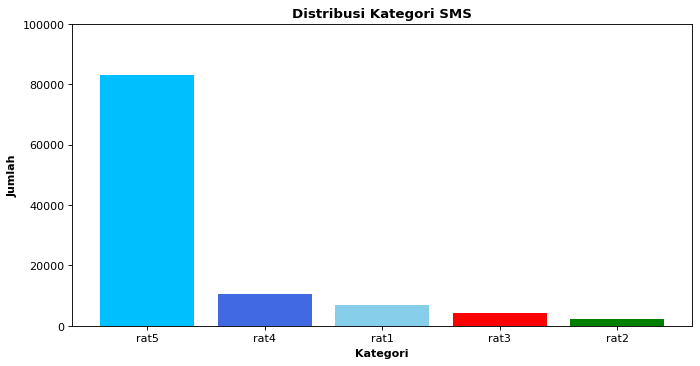

In [116]:
height = data['rating'].value_counts()
labels = ('rat5', 'rat4', 'rat1', 'rat3', 'rat2')
y_pos = np.arange(len(labels))

plt.figure(figsize=(10,5), dpi=80)
plt.ylim(0,100000)
plt.title('Distribusi Kategori SMS', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue', 'red', 'green'])
plt.xticks(y_pos, labels)
plt.show()


#Text Preprocessing

In [117]:
import re

# Buat fungsi untuk melakukan case folding
def caseFolding(text):
  text = text.lower()                                 # Ubah jadi lowercase
  text = re.sub(r'https?://\S+|www\.\S+', '', text)   # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)             # Menghapus angka
  text = re.sub(r'[^\w\s]', '', text)                 # Menghapus tanda baca
  text = text.strip()
  return text

In [119]:
rawsample = data['reviewContent'].iloc[5]
case_folding = caseFolding(rawsample)

print('Raw text : ', rawsample)
print('case folding : ', case_folding)

Raw text :  baru 10 bulan layarnya dah bergaris
case folding :  baru  bulan layarnya dah bergaris


#Word Normalization

In [120]:
# Download corpus singkatan
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2022-03-30 16:38:07--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv.2’

key_norm.csv.2      100%[===================>]  79.07K  --.-KB/s    in 0.005s  

2022-03-30 16:38:07 (16.6 MB/s) - ‘key_norm.csv.2’ saved [80969/80969]



In [121]:
key_norm = pd.read_csv('key_norm.csv')

# Buat fungsi untuk melakukan word normalization
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

In [122]:
raw_tex = data['reviewContent'].iloc[10]
case_folding = caseFolding(raw_tex)
word_normalization = text_normalize(case_folding)

print('Raw text\t: ', raw_tex)
print('Case folding\t: ', case_folding)
print('Word Normalization\t: ', word_normalization)

Raw text	:  Kualitas ok
Case folding	:  kualitas ok
Word Normalization	:  kualitas ok


#Stopword Removal

In [123]:
from nltk.corpus import stopwords

stopwords_id = stopwords.words('indonesian')

In [124]:
len(stopwords_id)

758

In [46]:
stopwords_id

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [125]:
# Buat fungsi untuk langkah stopwords removal

def remove_stopwords(text):
  clean_word = []
  all_text = text.split()
  for word in all_text:
    if word not in stopwords_id:
      clean_word.append(word)
  return ' '.join(clean_word)

In [127]:
raw_tex = data['reviewContent'].iloc[100]
case_folding = caseFolding(raw_tex)
word_normalization = text_normalize(case_folding)
stopwords_removal = remove_stopwords(word_normalization)

print('Raw text\t: ', raw_tex)
print('Case folding\t: ', case_folding)
print('Word normalization\t: ', word_normalization)
print('Stopwords removal\t: ', stopwords_removal)

Raw text	:  VERY GOOD
Case folding	:  very good
Word normalization	:  very good
Stopwords removal	:  very good


In [128]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming Bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text


In [132]:
raw_text = data['reviewContent'].iloc[111]
case_folding = caseFolding(raw_text)
word_normalization = text_normalize(case_folding)
stopwords_removal = remove_stopwords(word_normalization)
text_stemming = stemming(stopwords_removal)

print('Raw text\t: ', raw_text)
print('Case folding\t: ', case_folding)
print('Word normalization\t: ', word_normalization)
print('Stopwords removal\t: ', stopwords_removal)
print('Stemming\t: ', text_stemming)

Raw text	:  Packaging rapi, flashdiksnya ORI, kapasitasnya sesuai dengan detail produk yang dicantumkan dan foto dengan barangnya sesuai + barangnya datang sesuai tepat waktu. Makasih ya.. 😘
Case folding	:  packaging rapi flashdiksnya ori kapasitasnya sesuai dengan detail produk yang dicantumkan dan foto dengan barangnya sesuai  barangnya datang sesuai tepat waktu makasih ya
Word normalization	:  packaging rapi flashdiksnya original kapasitasnya sesuai dengan detail produk yang dicantumkan dan foto dengan barangnya sesuai barangnya datang sesuai tepat waktu terimakasih ya
Stopwords removal	:  packaging rapi flashdiksnya original kapasitasnya sesuai detail produk dicantumkan foto barangnya sesuai barangnya sesuai terimakasih ya
Stemming	:  packaging rapi flashdiksnya original kapasitas sesuai detail produk cantum foto barang sesuai barang sesuai terimakasih ya


#Text Preprocessing Pipeline

In [134]:
def text_preprocessing_process(text):
  print(text, ' ', type(text))
  text = caseFolding(text)
  text = text_normalize(text)
  text = remove_stopwords(text)
  text = stemming(text)
  return text

In [135]:
%%time
data['clean_text'] = data['reviewContent'].apply(text_preprocessing_process)
#perhatikan waktu komputasi

Streaming output truncated to the last 5000 lines.
Barang cukup bagus selaras harga yang dipatok. Cuma spec. nya nggak sesai. Socket USB cuma 1, baru sebatas DVB-T  (belum DVB T2) dan DVD C. Kartu Garansi dan Bukti Pembelian tidak disertakan. Padahal itu menjadi syarat dalam komplain garansi bila dikemudian hari diperlukan.   <class 'str'>
Barang cukup bagus, dipengaturan digital hanya ada DVB-T dan C, ternyata sudah termasuk DVB-T2, sehingga bisa menikmati siaran tv digital. TOP...   <class 'str'>
Alhamdulillah, tv bekerja dengan baik dan barang sampai hanya dalam waktu 2 hari, terima kasih lazada.   <class 'str'>
2 hari sampe batam, tdk sesuai deskripsi, dvb s/s2 nya ga ada, jd ga bisa colok langsung ke parabola   <class 'str'>
layar retak, ingin return caranya bagaimana ya?   <class 'str'>
Masih dikerdus belom dipakai hahaha   <class 'str'>
order tgl 4 april sampai 19 april, cukup lma krna lokasi saya kab. berau kaltim, tp secara keseluruhan cukup puas, brang sampe dengan slmat, har

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107029 entries, 0 to 203786
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   itemId          107029 non-null  int64  
 1   category        107029 non-null  object 
 2   name            107029 non-null  object 
 3   rating          107029 non-null  int64  
 4   originalRating  8 non-null       float64
 5   reviewTitle     21078 non-null   object 
 6   reviewContent   107029 non-null  object 
 7   likeCount       107029 non-null  int64  
 8   upVotes         107029 non-null  int64  
 9   downVotes       107029 non-null  int64  
 10  helpful         107029 non-null  bool   
 11  relevanceScore  107029 non-null  float64
 12  boughtDate      100564 non-null  object 
 13  clientType      107029 non-null  object 
 14  retrievedDate   107029 non-null  object 
 15  clean_text      107029 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(8)
memory usage

In [3]:
#simpan data hasil preprocessing
data.to_csv('clean_data.csv')

NameError: ignored

In [25]:
data = pd.read_csv('clean_data.csv')

In [26]:
#memisah data dan target
x = data['clean_text'].astype('U')
y = data['rating']

In [27]:
x = x[:10000]

In [28]:
y = y[:10000]

#Feature Extractions

##Bag of Word & N-Gram

In [29]:
#mengubah text ke vector dengan metode BoW
from sklearn.feature_extraction.text import CountVectorizer

#bag of word
vec = CountVectorizer(ngram_range=(1,1))
vec.fit(x)

CountVectorizer()

In [30]:
# Melihat jumlah token / fitur yang dihasilkan Bag of Words
len(vec.get_feature_names_out())

8393

In [31]:
# Melihat fitur-fitur apa saja yang ada dalam korpus
vec.get_feature_names_out()

array(['aada', 'aamiin', 'ababila', ..., 'zuma', 'zuper', 'zzz'],
      dtype=object)

In [32]:
x_unigram = vec.transform(x).toarray()

x_unigram

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
data_unigram = pd.DataFrame(x_unigram, columns = vec.get_feature_names_out())
data_unigram

,aada,aamiin,ababila,abai,abal,abang,abidin,abis,abiss,abissee,...,zen,zenfone,zipper,zippernya,zone,zonk,zs,zuma,zuper,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
with open('hasil_bow.pickle', 'wb') as output:
  pickle.dump(x_unigram, output)

##TF-IDF & N-Gram

In [38]:
#mengubah teks menjadi vector dengan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(x)

x_tf_idf = tf_idf.transform(x)

In [39]:
# Melihat jumlah token / fitur yang dihasilkan TF-IDF
len(tf_idf.get_feature_names_out())

8393

In [41]:
x_tf_idf = tf_idf.transform(x).toarray()

x_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
data_tf_idf = pd.DataFrame(x_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aada,aamiin,ababila,abai,abal,abang,abidin,abis,abiss,abissee,...,zen,zenfone,zipper,zippernya,zone,zonk,zs,zuma,zuper,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Simpan objek dari hasil TF-IDF
with open('hasil_tf_idf.pickle', 'wb') as ouput:
  pickle.dump(x_tf_idf, ouput)

#Feature Selection

In [45]:
x = np.array(data_tf_idf)
y = np.array(y)

In [47]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# K features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=1000) 
x_kbest_features = chi2_features.fit_transform(x, y) 
  
# Reduced features 
print('Original feature number:', x.shape[1]) 
print('Reduced feature number:', x_kbest_features.shape[1]) 

Original feature number: 8393
Reduced feature number: 1000


In [48]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,3.136632
1,1.013737
2,2.973580
3,0.184242
4,4.442199
...,...
8388,0.765068
8389,0.125528
8390,0.287815
8391,0.323729


In [49]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,3.136632,aada
1,1.013737,aamiin
2,2.973580,ababila
3,0.184242,abai
4,4.442199,abal
...,...,...
8388,0.765068,zonk
8389,0.125528,zs
8390,0.287815,zuma
8391,0.323729,zuper


In [50]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
3539,136.611101,kecewa
6531,102.927911,rusak
3253,101.997398,jelek
751,94.077445,batal
7497,77.626066,tanggal
...,...,...
7966,0.033249,tukang
4576,0.033249,masti
3512,0.033249,kaye
6935,0.033249,semuagk


In [51]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([False, False, False, ..., False, False, False])

In [53]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []
for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature
selected_feature

['abidin',
 'activationnyacode',
 'aduh',
 'agian',
 'agustus',
 'ahmad',
 'aju',
 'akam',
 'akh',
 'akses',
 'aktifin',
 'aktivasitaapi',
 'alamat',
 'alas',
 'alat',
 'alhamdulillah',
 'alhamdulillahbarang',
 'alhirnya',
 'alias',
 'alteco',
 'aluminium',
 'aman',
 'amantoh',
 'aminn',
 'aneh',
 'animasi',
 'antivirus',
 'antivirusnya',
 'ap',
 'apa',
 'apadah',
 'apaka',
 'apaterima',
 'apkah',
 'aqous',
 'aqua',
 'aquanya',
 'aqx',
 'arduino',
 'areaahdd',
 'ark',
 'aspal',
 'asuuu',
 'ata',
 'atur',
 'auto',
 'available',
 'awalaupun',
 'awet',
 'awetawetnya',
 'awetmakasih',
 'axioo',
 'bab',
 'babakan',
 'baca',
 'back',
 'bad',
 'bagi',
 'bagus',
 'baguscm',
 'baguscuma',
 'bagusrapi',
 'bagussayang',
 'bagussspacking',
 'bagustq',
 'balikin',
 'banget',
 'bangetkirain',
 'bangsat',
 'baran',
 'barang',
 'barangnyq',
 'basics',
 'batal',
 'batalin',
 'batalkn',
 'batas',
 'baut',
 'bayar',
 'bayarny',
 'beda',
 'bedacepet',
 'bekas',
 'bekassaya',
 'bekassetelah',
 'belakang',


In [62]:
# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(x_kbest_features, columns=selected_feature)
data_selected_feature

,abidin,activationnyacode,aduh,agian,agustus,ahmad,aju,akam,akh,akses,...,yahik,yak,yapersyaratan,yasy,yaw,yeee,ygcabang,yh,yulia,zippernya
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
with open('best_feature_chi2.pickle', 'wb') as output:
  pickle.dump(x_kbest_features, output)

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()
vec.fit(data_selected_feature)

CountVectorizer()

#Modelling (Machine Learning)

In [66]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [68]:
# membagi bagi data
x_train, x_test, y_train, y_test = train_test_split(x_kbest_features, y, test_size=0.2)

In [71]:
#membuat model dan mengeksport model
from joblib import dump
algorithm = MultinomialNB()
model = algorithm.fit(x_train, y_train)

dump(model, filename='model_1.joblib')

['model_1.joblib']

In [72]:
#membuat prediksi model dari data test
model_pred = model.predict(x_test)
model_pred

array([5, 5, 5, ..., 5, 5, 1])